n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |     80 |             - |             -
     2 |      200 |    100 |  0.0053389751 |         ideal
     3 |      300 |    100 |  0.0083027357 |         ideal
     4 |      400 |    100 |  0.0112832238 |         ideal
     5 |      500 |    100 |  0.0110766299 |         nadir
     6 |      600 |    100 |  0.0156842633 |         ideal
     7 |      700 |    100 |  0.0044056274 |         ideal
     8 |      800 |    100 |  0.0297506992 |         nadir
     9 |      900 |    100 |  0.0044634968 |         ideal
    10 |     1000 |    100 |  0.0289971570 |         nadir
    11 |     1100 |    100 |  0.0354514923 |         nadir
    12 |     1200 |    100 |  0.0050579332 |         nadir
    13 |     1300 |    100 |  0.0195473129 |         nadir
    14 |     1400 |    100 |  0.0222839978 |             f
    15 |     1500 |    100 |  0.0153063099 |         nadir
    16 |     1600 |    100 |  0.0172324115 |         nad

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

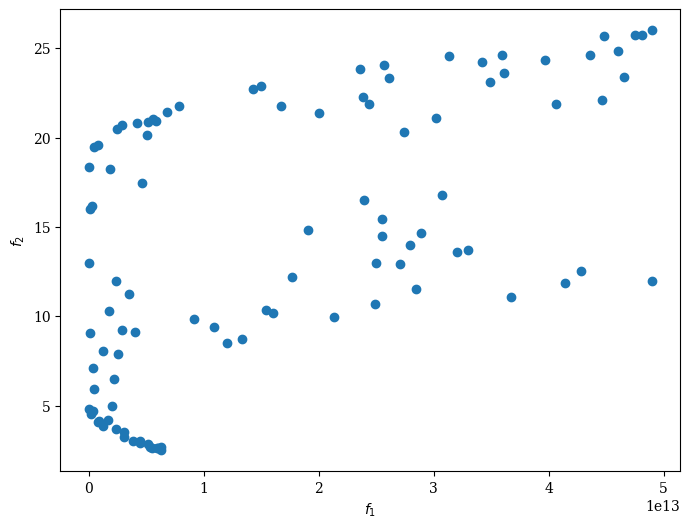

In [1]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

# 1. 定义问题环境
class DetectorDesign(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=2,    # 两个决策变量: L 和 lambda
                         n_obj=6,    # 六个目标函数
                         n_ieq_constr=0, # 不等式约束数量 (如果没有额外约束设为0)
                         # 设置变量的下界 (L_min, lambda_min)
                         xl=np.array([5.0e5, 200.0]), 
                         # 设置变量的上界 (L_max, lambda_max)
                         xu=np.array([10.0e6, 1600.0]))

    def _evaluate(self, x, out, *args, **kwargs):
        L = x[0]
        lam = x[1] # lambda是python关键字，通常用lam或lmbda代替

        # --- 这里定义你的6个目标函数 ---
        # 目前用简单的数学关系作为示例 (假设我们想让某些指标最小化)
        # 注意：pymoo默认是"最小化"所有目标。如果你的某个指标需要"最大化"（比如SNR），
        # 请在该函数前加负号，即: -f(x)
        
        f1 = (L - 3e6)**2 + (lam - 1000)**2  # 示例：试图接近某个特定值
        f2 = L / 1e6 + lam / 100            # 示例：简单的线性关系
        f3 = (L * lam) / 1e9                # 示例
        f4 = np.sin(L/1e6) * lam            # 示例
        f5 = abs(L - 8e6) + abs(lam - 500)  # 示例
        f6 = 1e7/L + 2000/lam               # 示例

        # 将结果存入输出字典 'F' 中
        out["F"] = [f1, f2, f3, f4, f5, f6]

# 2. 配置算法 (NSGA-II)
# pop_size 是种群大小，越大搜索越细致，但计算越慢
algorithm = NSGA2(pop_size=100)

# 3. 运行优化
# seed 保证结果可复现
res = minimize(DetectorDesign(),
               algorithm,
               ('n_gen', 200),  # 迭代代数 (Generations)，即"推进"的次数
               seed=1,
               verbose=True)

# 4. 查看结果
print(f"找到的 Pareto 解的数量: {len(res.X)}")
print("部分决策变量解 (L, lambda):")
print(res.X[:5]) # 打印前5个解
print("对应的目标函数值:")
print(res.F[:5]) # 打印前5个对应的函数值
#绘制Pareto域散点图
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
Scatter().add(res.F).show() 
# 5. 可视化 Pareto 前沿 (仅前两个目标函数)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
Scatter().add(res.F[:, :2]).show()